<a href="https://colab.research.google.com/github/Pathway2008/CarPrice/blob/main/electric_auto_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.font_manager as fm
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [12]:
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

In [4]:
train = pd.read_csv('/content/drive/MyDrive/CarPrice/new_car/train.csv')
test = pd.read_csv('/content/drive/MyDrive/CarPrice/new_car/test.csv')
sub = pd.read_csv('/content/drive/MyDrive/CarPrice/new_car/sample_submission.csv')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7497 entries, 0 to 7496
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        7497 non-null   object 
 1   제조사       7497 non-null   object 
 2   모델        7497 non-null   object 
 3   차량상태      7497 non-null   object 
 4   배터리용량     4786 non-null   float64
 5   구동방식      7497 non-null   object 
 6   주행거리(km)  7497 non-null   int64  
 7   보증기간(년)   7497 non-null   int64  
 8   사고이력      7497 non-null   object 
 9   연식(년)     7497 non-null   int64  
 10  가격(백만원)   7497 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 644.4+ KB


In [15]:
nan_counts = train['배터리용량'].isna().groupby(train['모델']).sum().reset_index(name='NaN_개수')

manufacturer_model_df = (
    train.groupby(['제조사', '모델'])
    .size()
    .reset_index(name='모델_개수')
    .merge(nan_counts, on='모델', how='left')
)

# 제조사별 내림차순 및 모델 개수별 내림차순으로 정렬
manufacturer_model_df = manufacturer_model_df.sort_values(
    by=['제조사', '모델_개수'],
    ascending=[True, False]
).reset_index(drop=True)

In [16]:
manufacturer_model_df

,제조사,모델,모델_개수,NaN_개수
0,A사,RSeTGT,385,282
1,A사,eT,379,51
2,A사,Q4eT,378,150
3,B사,i5,414,79
4,B사,i3,388,61
5,B사,iX,367,291
6,H사,ION6,379,144
7,H사,KNE,365,122
8,H사,ION5,353,133
9,H사,IONIQ,140,32


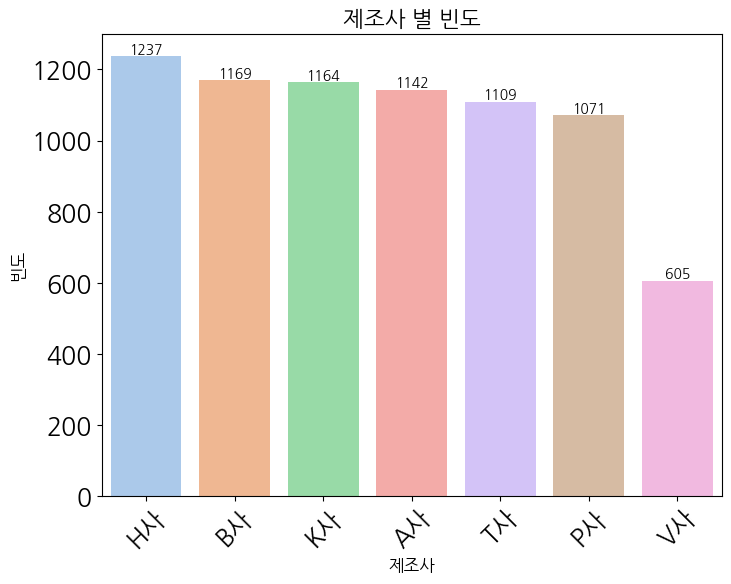

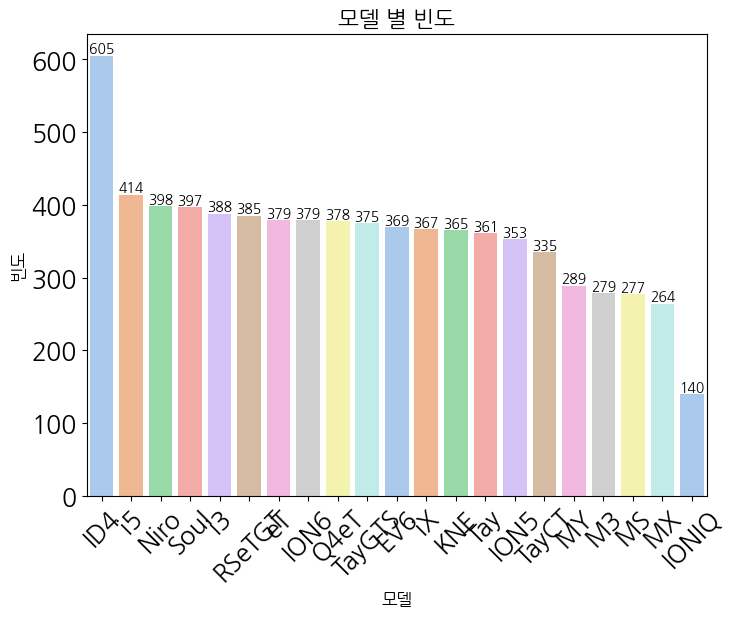

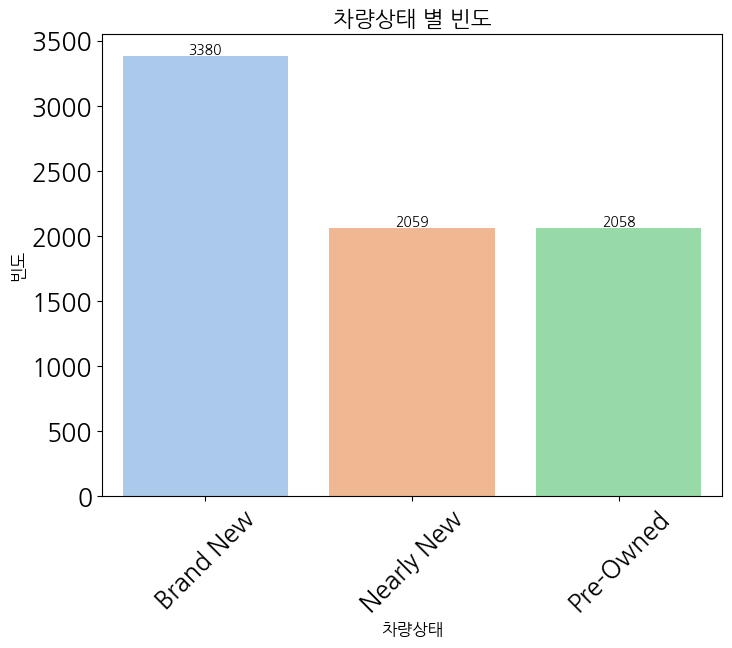

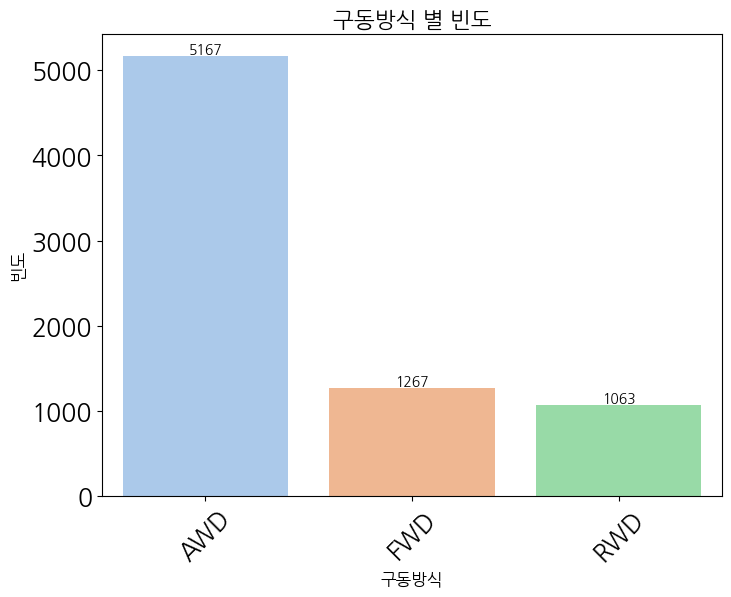

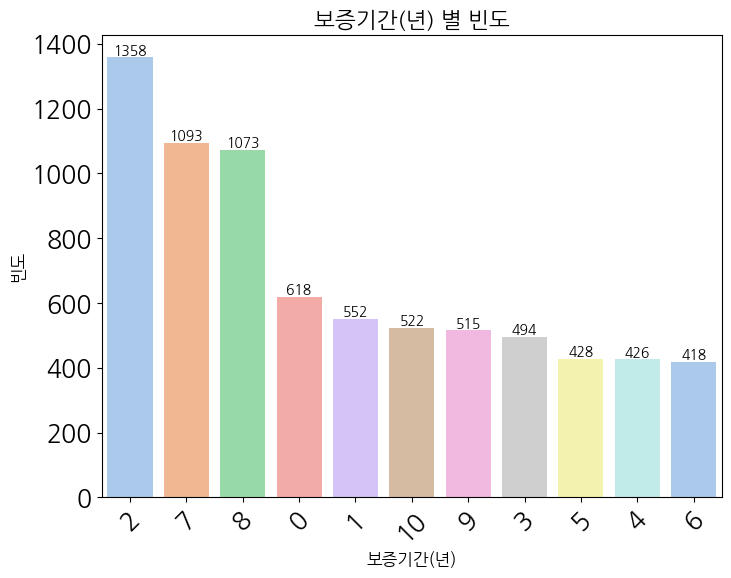

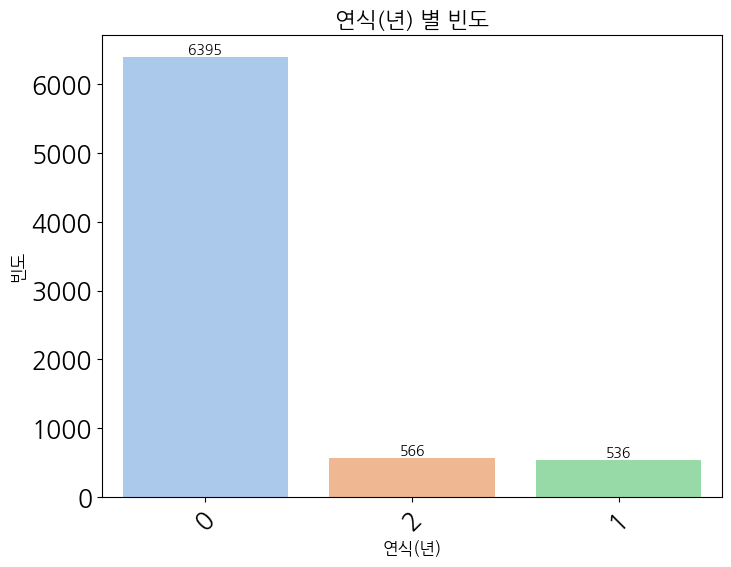

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 생성 함수
def plot_countplot(data, column, figsize=(8, 6), palette='pastel'):
    plt.figure(figsize=figsize)
    ax = sns.countplot(data=data, x=column, palette=palette, order=data[column].value_counts().index)

    # 막대 위에 값 표시
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10)

    plt.title(f'{column} 별 빈도', fontsize=16)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('빈도', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

# 각 컬럼에 대해 그래프 생성
columns_to_plot = ['제조사', '모델', '차량상태', '구동방식', '보증기간(년)', '연식(년)']
for col in columns_to_plot:
    plot_countplot(train, col)

In [ ]:
# 제조사별 모델 분포를 시각화 (countplot)
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=train, x='제조사', hue='모델', palette='pastel')

# 그래프 제목과 축 레이블 설정
plt.title('제조사별 모델 분포', fontsize=16)
plt.xlabel('제조사', fontsize=12)
plt.ylabel('빈도', fontsize=12)

# 범례 표시
plt.legend(title='모델', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

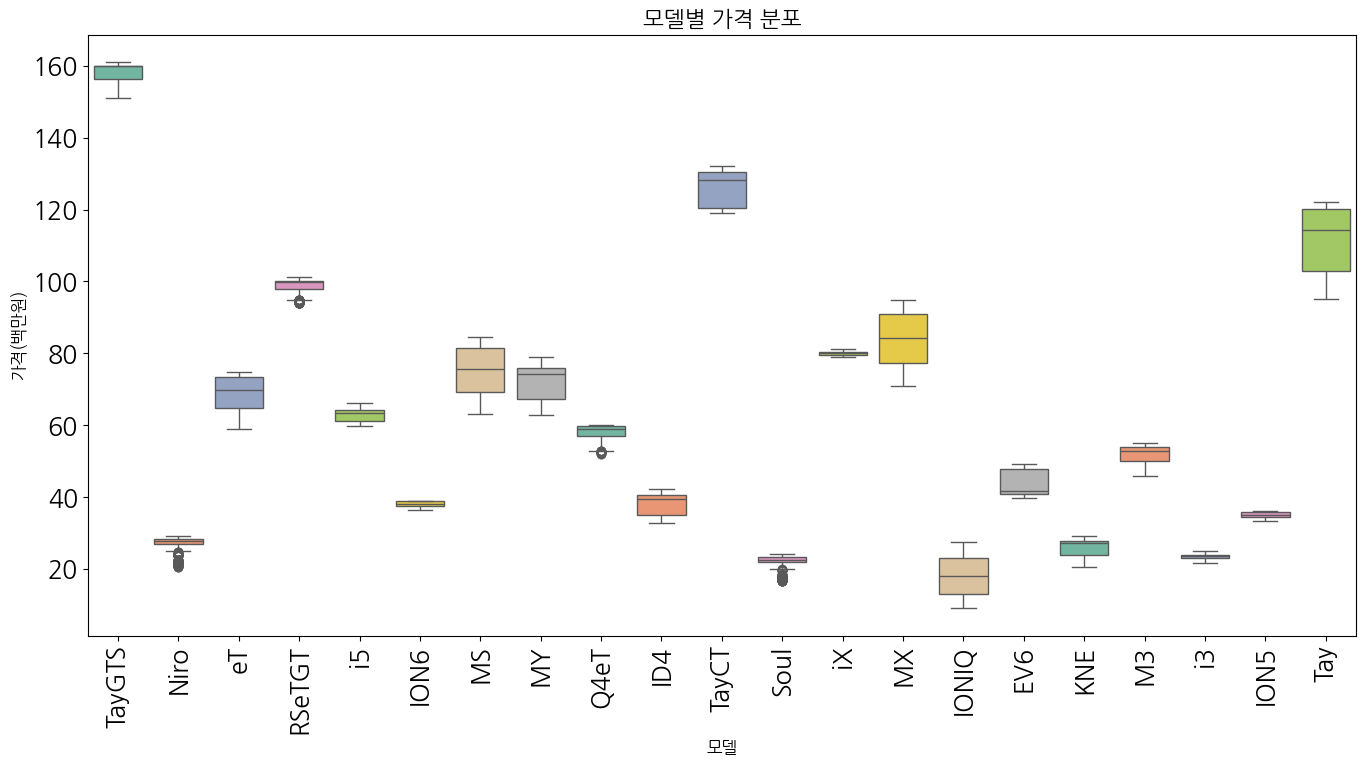

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드

# 모델별 가격 분포 시각화 (박스 플롯)
plt.figure(figsize=(14, 8))  # 그래프 크기 설정
sns.boxplot(data=train, x='모델', y='가격(백만원)', palette='Set2')

# 그래프 제목과 라벨 설정
plt.title('모델별 가격 분포', fontsize=16)
plt.xlabel('모델', fontsize=12)
plt.ylabel('가격(백만원)', fontsize=12)

# x축 레이블이 겹치지 않도록 회전
plt.xticks(rotation=90)

# 그래프 표시
plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

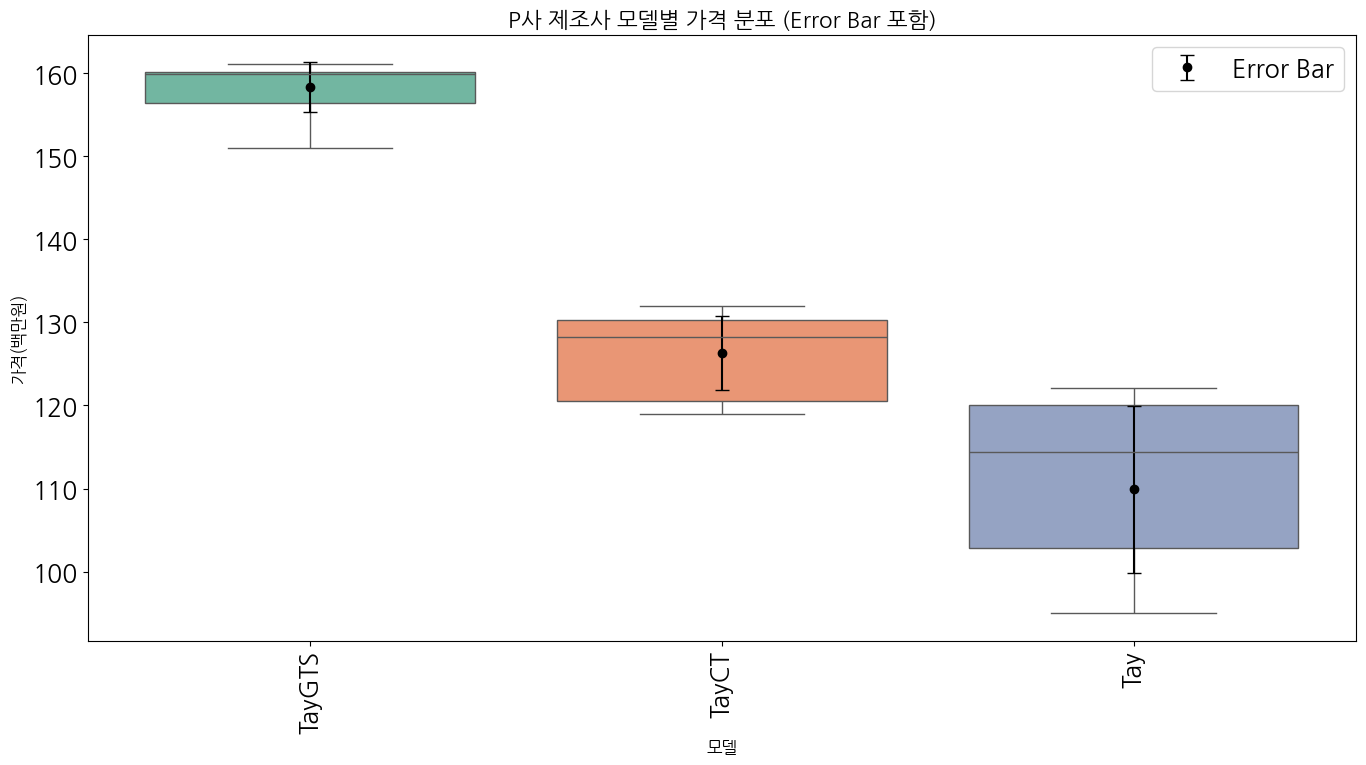

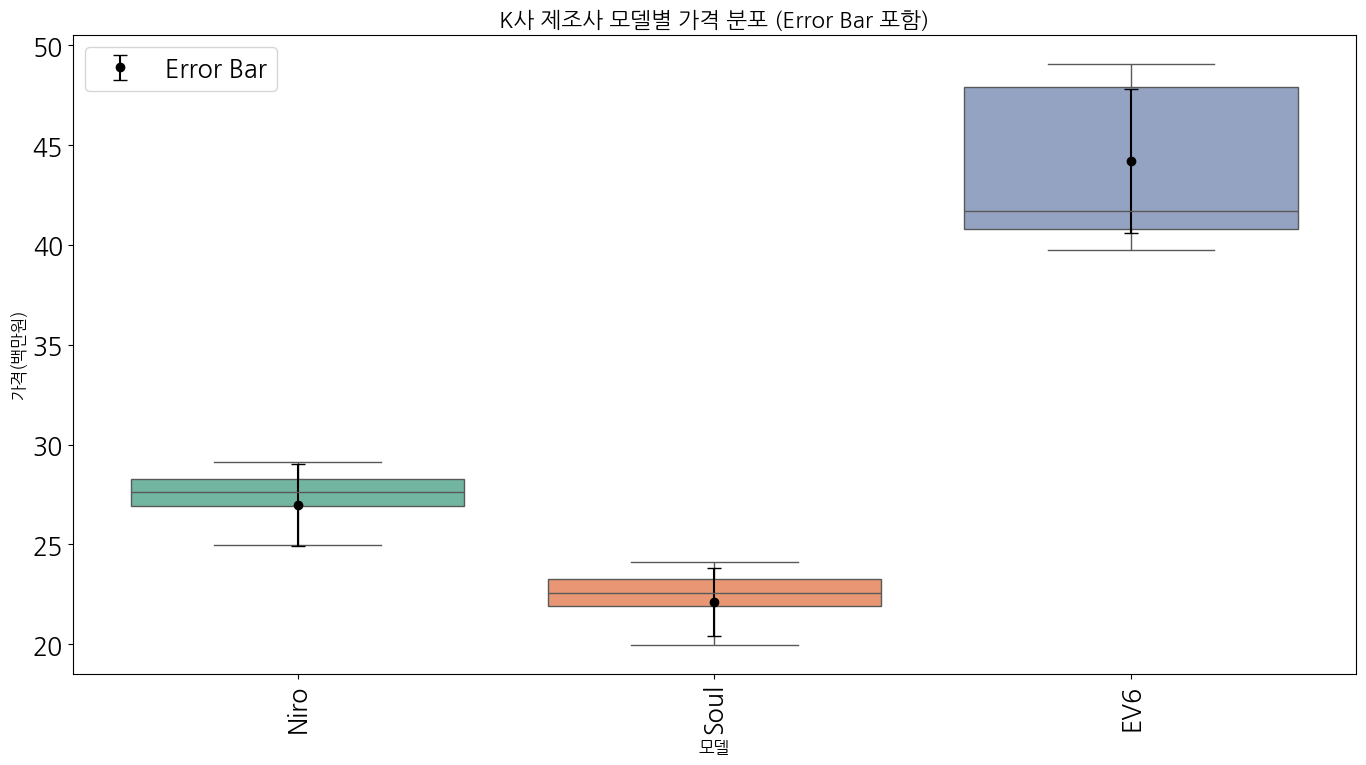

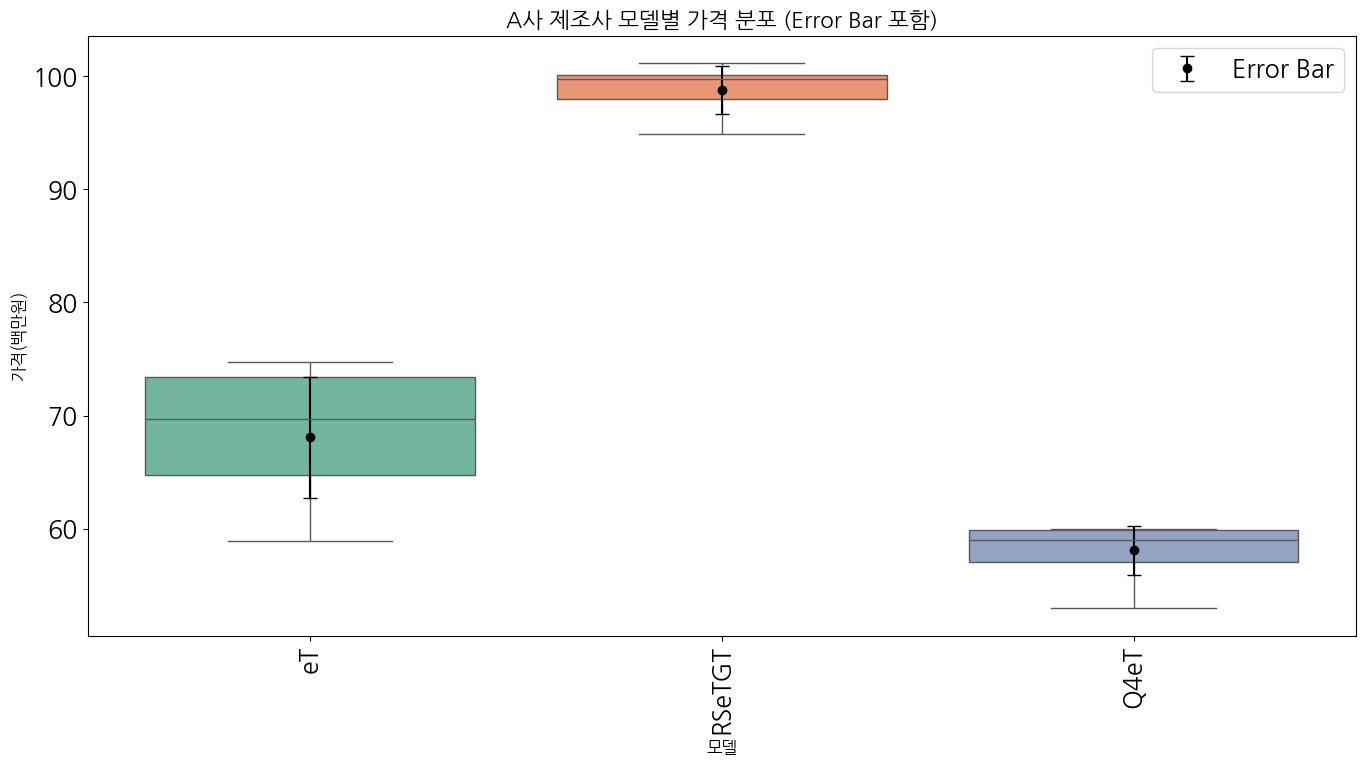

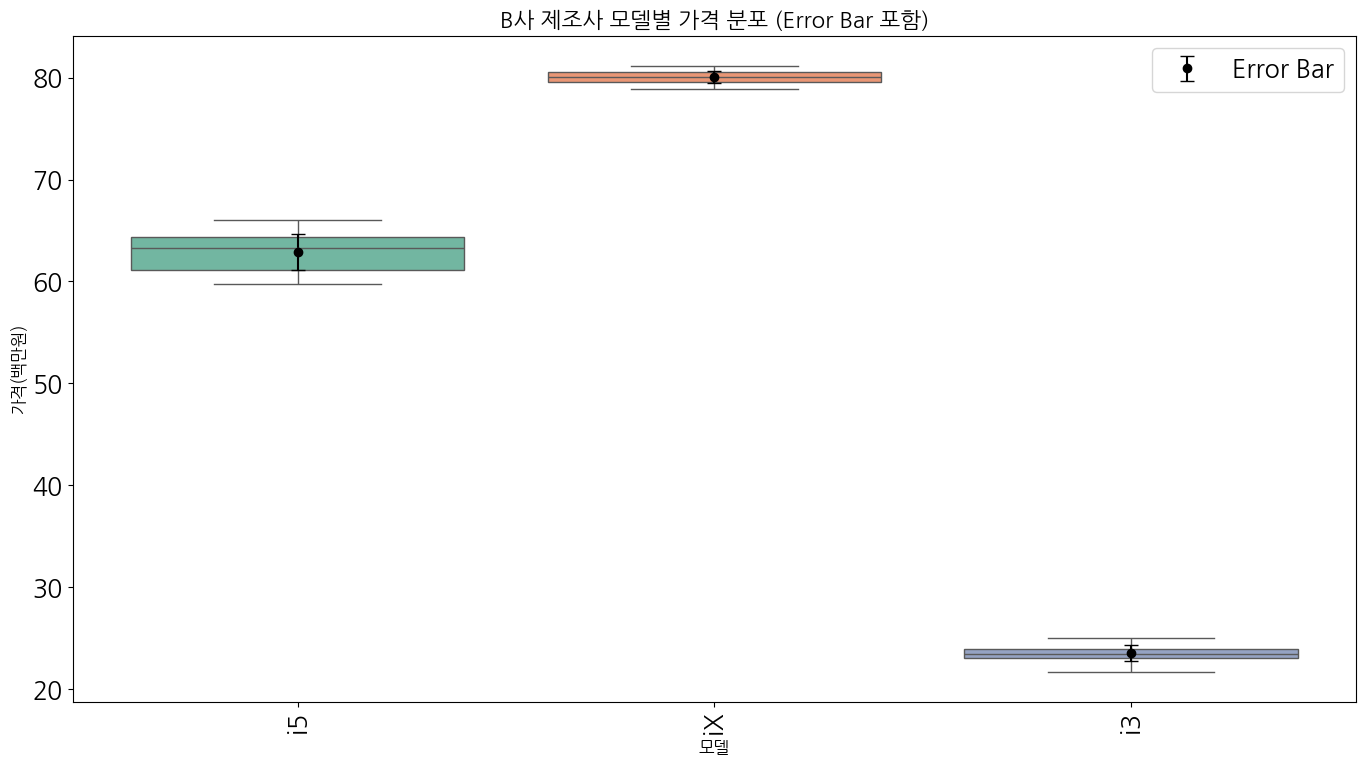

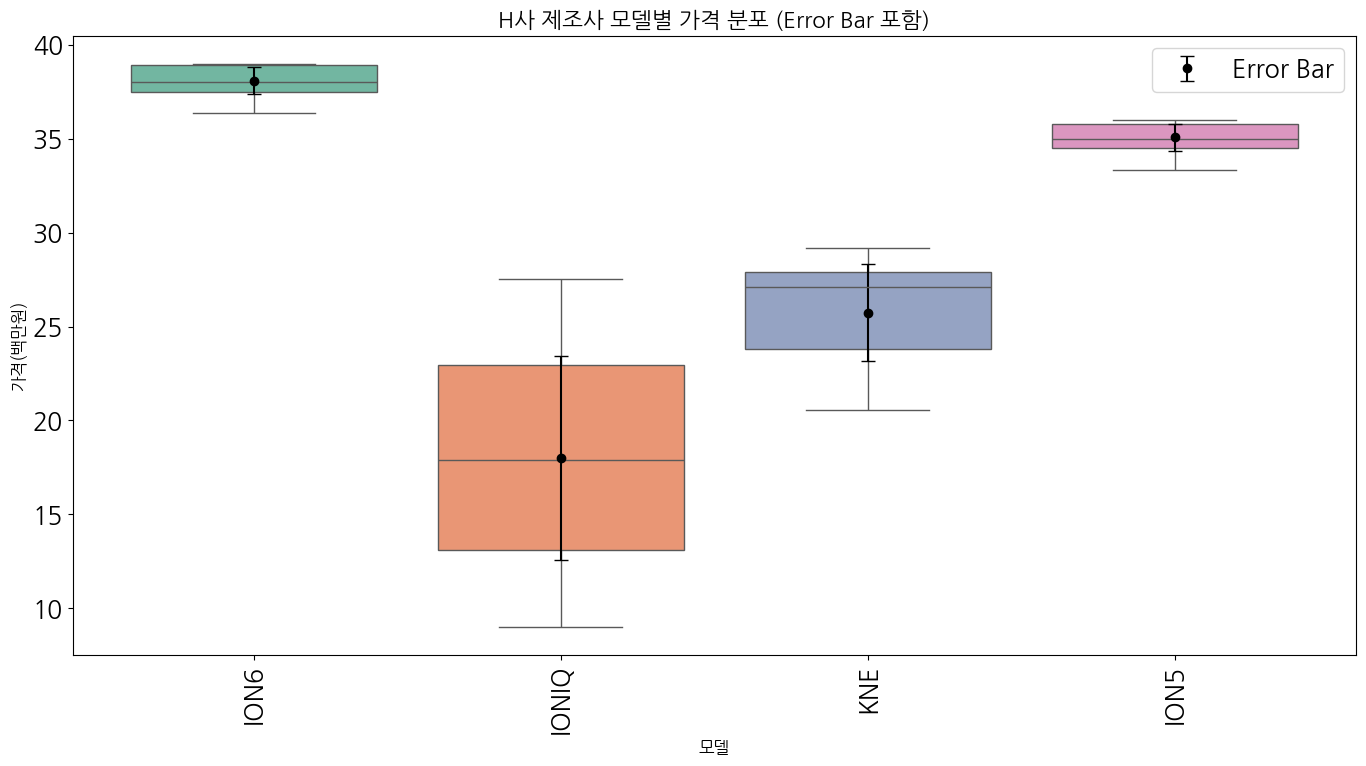

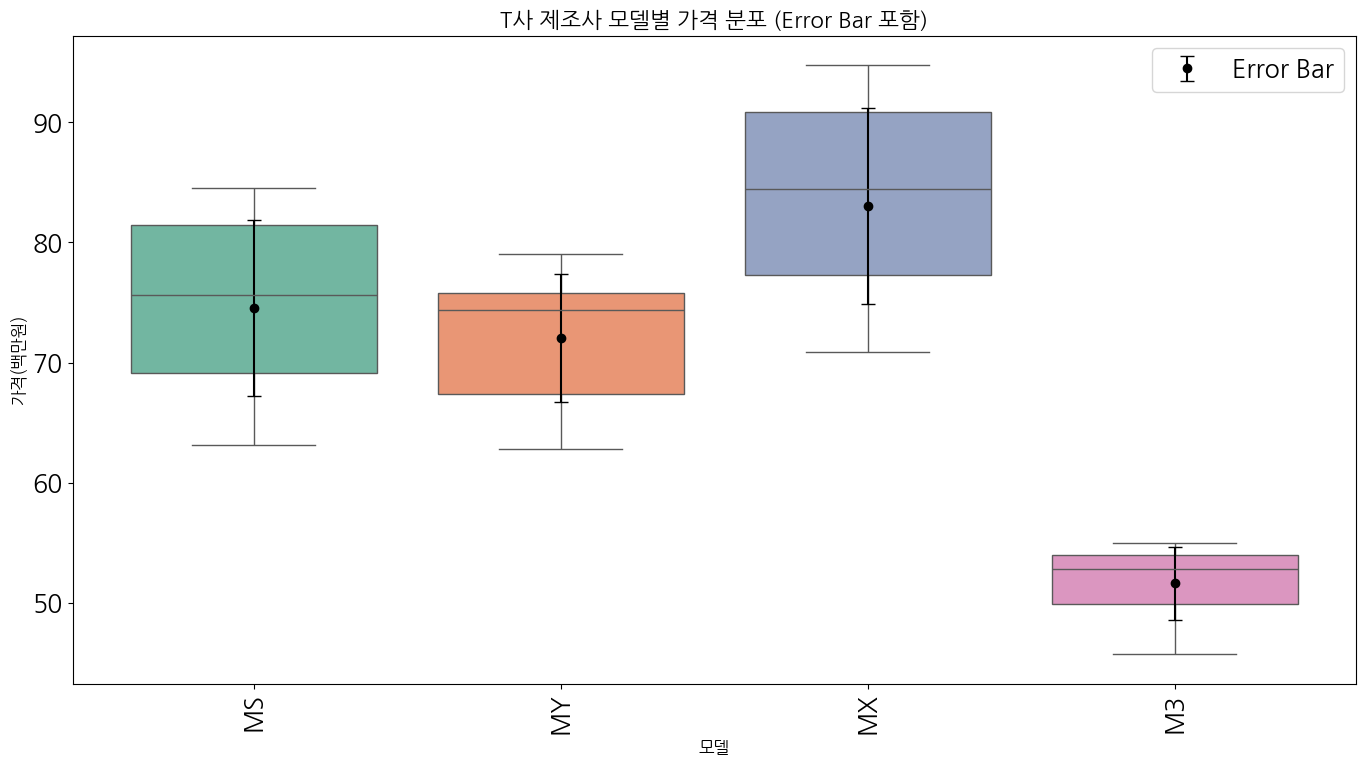

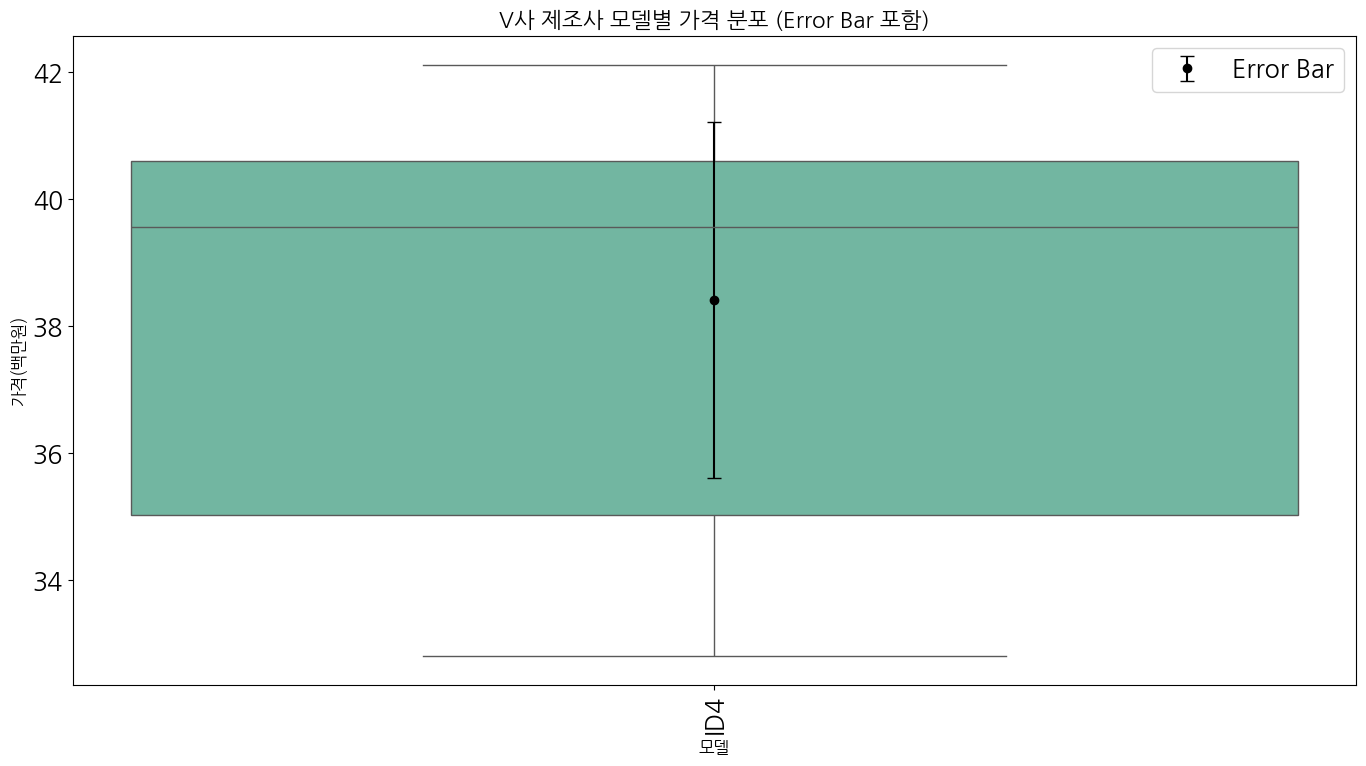

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 제조사 리스트 가져오기
manufacturers = train['제조사'].unique()

# 그래프 크기 설정
plt.figure(figsize=(14, 8))

# 각 제조사별로 그래프를 그립니다.
for idx, manufacturer in enumerate(manufacturers):
    plt.figure(figsize=(14, 8))  # 각 그래프마다 크기를 설정
    manufacturer_data = train[train['제조사'] == manufacturer]

    # 박스플롯 생성 (제조사 내에서 모델별 가격 분포)
    ax = sns.boxplot(data=manufacturer_data, x='모델', y='가격(백만원)', palette='Set2', showfliers=False)

    # x축 위치와 모델명 가져오기
    x_positions = ax.get_xticks()  # x축 위치
    x_labels = [label.get_text() for label in ax.get_xticklabels()]  # 모델명

    # 각 모델별 평균과 표준편차 계산
    model_avg_std = manufacturer_data.groupby('모델')['가격(백만원)'].agg([np.mean, np.std])

    # 평균과 표준편차를 error bar로 추가
    for model, xpos in zip(x_labels, x_positions):
        mean = model_avg_std.loc[model, 'mean']
        std = model_avg_std.loc[model, 'std']
        ax.errorbar(xpos, mean, yerr=std, fmt='o', color='black', capsize=5, label="Error Bar" if model == x_labels[0] else "")

    # 그래프 제목과 레이블 설정
    plt.title(f'{manufacturer} 제조사 모델별 가격 분포 (Error Bar 포함)', fontsize=16)
    plt.xlabel('모델', fontsize=12)
    plt.ylabel('가격(백만원)', fontsize=12)

    # X축 레이블이 겹치지 않도록 회전
    plt.xticks(rotation=90)

    # 범례 추가
    plt.legend()

    # 그래프 표시
    plt.tight_layout()
    plt.show()


In [22]:
train[train['모델'] == 'TayGTS'].sort_values(by='가격(백만원)')

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
3436,TRAIN_3436,P사,TayGTS,Pre-Owned,64.683,AWD,194796,2,No,0,151.00
31,TRAIN_0031,P사,TayGTS,Pre-Owned,64.683,AWD,97476,2,No,0,151.00
3692,TRAIN_3692,P사,TayGTS,Pre-Owned,64.683,AWD,53538,2,No,0,151.00
1187,TRAIN_1187,P사,TayGTS,Pre-Owned,67.378,AWD,111944,2,No,0,151.00
6250,TRAIN_6250,P사,TayGTS,Pre-Owned,64.683,AWD,163674,2,No,0,151.00
...,...,...,...,...,...,...,...,...,...,...,...
2638,TRAIN_2638,P사,TayGTS,Brand New,NaN,AWD,668,2,No,0,160.96
1769,TRAIN_1769,P사,TayGTS,Brand New,NaN,AWD,1872,2,No,0,160.99
6617,TRAIN_6617,P사,TayGTS,Brand New,93.400,AWD,6547,2,No,0,160.99
7388,TRAIN_7388,P사,TayGTS,Brand New,93.400,AWD,9026,2,No,0,161.01


In [26]:
print(train[train['모델'] == 'ID4']['가격(백만원)'].describe())

count    605.000000
mean      38.411702
std        2.801953
min       32.810000
25%       35.020000
50%       39.560000
75%       40.600000
max       42.110000
Name: 가격(백만원), dtype: float64


In [25]:
model_avg_std = manufacturer_data.groupby('모델')['가격(백만원)'].agg(['mean', 'std'])
print(model_avg_std)

          mean       std
모델                      
ID4  38.411702  2.801953
